# Veri setinin yüklenmesi ve incelenmesi 

In [220]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv("diabetes.csv")
df = df.copy()
df.dropna(inplace = True)
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [222]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### bağımlı değişkenimize bakalım 


In [223]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

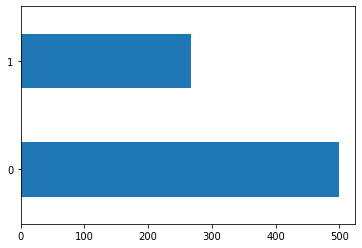

In [224]:
df.Outcome.value_counts().plot.barh();

# Bagımlı ve bağımsız değişken seçimleri 

In [225]:
y = df.Outcome

In [226]:
X = df.drop(["Outcome"] , axis = 1)

# Veri setinin Train - Test Olarak ayrılması 

In [227]:
from sklearn.model_selection import train_test_split , cross_val_score

In [261]:
X_train , X_test ,y_train , y_test = train_test_split(X ,y , test_size = 0.30 ,random_state = 11)

In [262]:
print(X_train.shape)
print(y_train.shape)


(537, 8)
(537,)


# Model Kurma 

### stats model 

In [263]:
import statsmodels.api as sm 

In [264]:
loj = sm.Logit(y_train , X_train)

In [265]:
log_model = loj.fit()

Optimization terminated successfully.
         Current function value: 0.599642
         Iterations 5


In [266]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                            7
Date:                Tue, 14 Apr 2020   Pseudo R-squ.:                 0.07057
Time:                        13:44:55   Log-Likelihood:                -322.01
converged:                       True   LL-Null:                       -346.46
Covariance Type:            nonrobust   LLR p-value:                 2.378e-08
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1177      0.035      3.367      0.001       0.049       0.186
Glucose                      0.0144      0.003      4.421      0.000       0.008       0.021
BloodPressure               -0.0334      0.006     -5.751      0.000      -0.045      -0.022
SkinThickness               -0.0017      0.007     -0.236      0.813      -0.016       0.012
Insulin                      0.0006      0.001      0.655      0.512      -0.001       0.002
BMI                         -0.0046      0.012     -0.368      0.713      -0.029       0.020
DiabetesPedigreeFunction     0.3046      0.288      1.058      0.290      -0.260       0.869
Age                         -0.0126      0.010     -1.205      0.228      -0.033       0.008
============================================================================================
"""

- Burdaki katsayılar yanıltıcıdır , gerçek katsayıları logistik model kurduğumuzda ulaşacağız 

## Logistik Model 

In [267]:
from sklearn.linear_model import LogisticRegression

In [268]:
log = LogisticRegression(solver = "liblinear")

In [269]:
log_model = log.fit(X_train , y_train)

In [270]:
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Tahmin 

In [271]:
from sklearn.metrics import confusion_matrix, roc_auc_score , roc_curve ,accuracy_score ,classification_report

In [272]:
log_model.intercept_ 
# B0

array([-5.08168053])

In [273]:
log_model.coef_ 


array([[ 1.02245736e-01,  2.67749237e-02, -1.88986212e-02,
        -3.18840095e-03, -4.02074237e-04,  5.29168633e-02,
         4.87012952e-01,  5.19649287e-03]])

In [274]:
log_model.predict(X_train)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

- sadece predict fonksiyonunu kullanırsak 0-1 tahmini yapar eğer oranlara erişmek istersek proba ekini kullanmalıyız 

In [275]:
log_model.predict_proba(X_train)[:5]

array([[0.33564265, 0.66435735],
       [0.63383155, 0.36616845],
       [0.49705728, 0.50294272],
       [0.51080403, 0.48919597],
       [0.77077667, 0.22922333]])

- 1.sutun 0 olma olsılığı ,2 sutun ise 1 olma olasılığıdır biz 1 olma olasılığı ile ilgileneceğiz 

In [276]:
y_pred = log_model.predict(X_train)

In [277]:
y_proba = log_model.predict_proba(X_train)[: , 1]
# 1 olma durumunu aldık 
y_proba[:5]

array([0.66435735, 0.36616845, 0.50294272, 0.48919597, 0.22922333])

#### kendi koşulumuzla 0-1 ataması yapma 

In [278]:
y_proba_if = [1 if i > 0.5 else 0 for i in y_proba]

In [279]:
y_proba_if[:5]

[1, 0, 1, 0, 0]

## Karmaşıklık matrisi 

In [280]:
confusion_matrix(y_train ,y_pred)

array([[318,  33],
       [ 84, 102]], dtype=int64)

# Doğru sınıflandırma oranı 

In [281]:
accuracy_score(y_train ,y_pred)

0.7821229050279329

## Sınıflandırma algoritması değerlendirme tablosu 

In [282]:
print(classification_report(y_train ,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       351
           1       0.76      0.55      0.64       186

    accuracy                           0.78       537
   macro avg       0.77      0.73      0.74       537
weighted avg       0.78      0.78      0.77       537



## Roc eğrisi oluşturma 

In [283]:
logit_roc_auc = roc_auc_score(y_train , y_pred)
logit_roc_auc

0.7271850013785497

In [284]:
fpr , tpr ,thresholds = roc_curve(y_train , y_proba_if)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.09401709 1.        ]
[0.        0.5483871 1.       ]
[2 1 0]


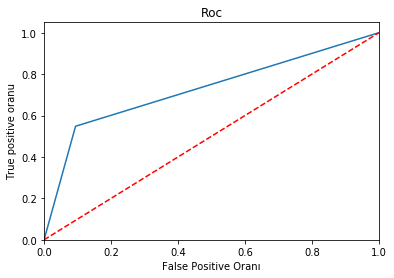

In [285]:
logit_roc_auc = roc_auc_score(y_train , y_pred)
fpr , tpr ,thresholds = roc_curve(y_train , y_proba_if)
plt.figure()
plt.plot(fpr ,tpr ,label  = "AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0 ,1] ,[0 ,1] ,"r--")
plt.xlim([0.0 ,1.0])
plt.ylim([0.0 ,1.05])
plt.xlabel("False Positive Oranı")
plt.ylabel("True positive oranu")
plt.title("Roc")
plt.show()

# Model Tuning

In [286]:
from sklearn.linear_model import LogisticRegression


In [287]:
log_model = LogisticRegression(solver = "liblinear").fit(X_train , y_train)


In [288]:
y_pred = log_model.predict(X_test)

In [289]:
y_proba = log_model.predict_proba(X_test)

In [290]:
accuracy_score(y_test ,y_pred)

0.7748917748917749

In [291]:
confusion_matrix(y_test ,y_pred)

array([[140,   9],
       [ 43,  39]], dtype=int64)

In [292]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       149
           1       0.81      0.48      0.60        82

    accuracy                           0.77       231
   macro avg       0.79      0.71      0.72       231
weighted avg       0.78      0.77      0.76       231



# Cross_val hatası hesaplama

In [293]:
cross_val_score(log_model ,X_test ,y_test ,cv= 10 ).mean()
# doğru tahmin oranıız 

0.7454380764163373